In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN, LSTM, GRU, Dense


In [2]:
data = """RNNs are good at sequence data
They remember past information
They are used in language modeling
RNNs can generate text"""

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
total_words = len(tokenizer.word_index) + 1


In [4]:
input_sequences = []
for line in data.split("\n"):
   token_list = tokenizer.texts_to_sequences([line])[0]
   for i in range(1, len(token_list)):
     n_gram_sequence = token_list[:i+1]
     input_sequences.append(n_gram_sequence)

In [5]:
max_seq_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')


In [6]:
X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)


In [7]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense

def build_model(cell_type="SimpleRNN", units=100):
    model = Sequential()
    model.add(Embedding(total_words, 10, input_length=max_seq_len - 1))
    
    if cell_type == "SimpleRNN":
        model.add(SimpleRNN(units))
    elif cell_type == "LSTM":
        model.add(LSTM(units))
    elif cell_type == "GRU":
        model.add(GRU(units))
    
    model.add(Dense(total_words, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


In [8]:
models = {}
histories = {}
for cell in ["SimpleRNN", "LSTM", "GRU"]:
 print(f"\nTraining {cell} model...")
 model = build_model(cell)
 history = model.fit(X, y, epochs=200, verbose=0)
 models[cell] = model
 histories[cell] = history



Training SimpleRNN model...

Training LSTM model...

Training GRU model...


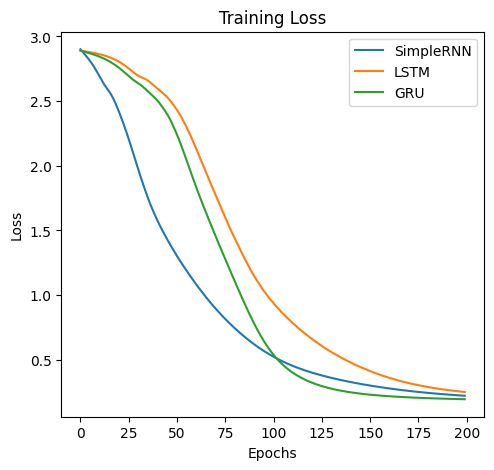

In [9]:
plt.figure(figsize=(12,5))
# Loss
plt.subplot(1,2,1)
for cell, hist in histories.items():
 plt.plot(hist.history['loss'], label=cell)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

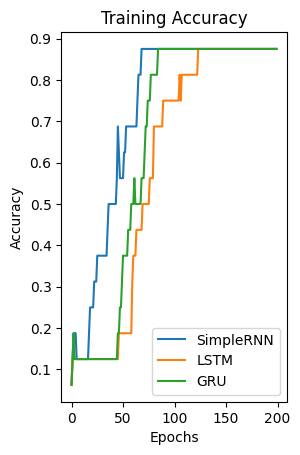

In [10]:
# Accuracy
plt.subplot(1,2,2)
for cell, hist in histories.items():
 plt.plot(hist.history['accuracy'], label=cell)
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [11]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def generate_text(model, seed_text, next_words=3):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len - 1, padding='pre')
        
        predicted = np.argmax(model.predict(token_list, verbose=0))
        
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        
        seed_text += " " + output_word
    
    return seed_text


In [12]:
seed = "RNNs are"
for cell, model in models.items():
 print(f"{cell} prediction: {generate_text(model, seed,3)}")


SimpleRNN prediction: RNNs are good at sequence
LSTM prediction: RNNs are good at sequence
GRU prediction: RNNs are good at sequence
